# Feature Selection - Univariate (ANOVA) Test For Classification

## ANOVA vs T Test

The t-test is a method that determines whether two populations are statistically different from each other, whereas ANOVA determines whether three or more populations are statistically different from each other. Both of them look at the difference in means and the spread of the distributions (i.e., variance) across groups; however, the ways that they determine the statistical significance are different.

ANOVA is the equivalent of running multiple t-tests. As a result, you'd need to run some post-hoc analysis to determine which of the individual level comparisons are significant.

## T-TEST & ANOVA (ANALYSIS OF VARIANCE)

#### What are they? 
The t-test is a method that determines whether two populations are statistically different from each other, whereas ANOVA determines whether three or more populations are statistically different from each other. Both of them look at the difference in means and the spread of the distributions (i.e., variance) across groups; however, the ways that they determine the statistical significance are different.

#### When are they used? 

These tests are performed when 1) the samples are independent of each other and 2) have (approximately) normal distributions or when the sample number is high (e.g., > 30 per group). More samples are better, but the tests can be performed with as little as 3 samples per condition.

#### How do they work?

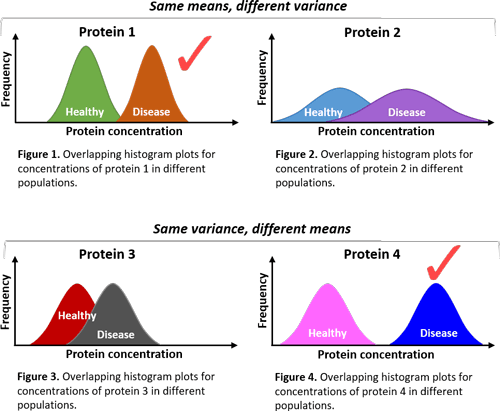

Download Data Files https://github.com/laxmimerit/Data-Files-for-Feature-Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# VarianceThreshold - Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [3]:
data = pd.read_csv("data/santander.csv", nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
x = data.drop("TARGET", axis=1) # Features
y = data["TARGET"] # Outcome

x.shape, y.shape

((20000, 370), (20000,))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 370), (4000, 370), (16000,), (4000,))

### Constant Features Removal

In [6]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [7]:
# No. of features after constants removal
constant_filter.get_support().sum()

291

In [8]:
# Returns True for all the features which are constants.
constant_list = [not temp for temp in constant_filter.get_support()] # Inversing the True to False and False to True
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [9]:
# Name of all the features which are constants
x.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [10]:
# removing all the constants from our Training and Test dataset.
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [11]:
# Now take a look at the original and the transformed data (after removing the constants)
x_train.shape, x_test.shape, x_train_filter.shape, x_test_filter.shape

((16000, 370), (4000, 370), (16000, 291), (4000, 291))

## Quasi Constants Feature Removal

In [12]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [13]:
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [14]:
quasi_constant_filter.get_support().sum()

245

In [15]:
x_train_quasi_filter = quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)

In [16]:
# Now take a look at the original and the transformed data (after removing the constants)
x_train.shape, x_test.shape, x_train_filter.shape, x_test_filter.shape, x_train_quasi_filter.shape, x_train_quasi_filter.shape

((16000, 370),
 (4000, 370),
 (16000, 291),
 (4000, 291),
 (16000, 245),
 (16000, 245))

## Duplicate Features Removal

In [17]:
x_train_T = x_train_quasi_filter.T
x_test_T = x_test_quasi_filter.T

In [18]:
# As we can see the pandas dataframe has been transformed in to numpy array after transpose.
type(x_train_T)

numpy.ndarray

In [19]:
# Changing numpy array back to pandas dataframe
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [20]:
# Now we can see after transpose the rows has become columns and columns has become rows.
x_train_T.shape, x_test_T.shape

((245, 16000), (245, 4000))

In [21]:
# Getting duplicate features count
x_train_T.duplicated().sum()

18

In [22]:
duplicated_features = x_train_T.duplicated()
duplicated_features

# True is duplicated and False is non duplicated rows.

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [23]:
# Removing duppicated features.
# After this the False becomes True and True becomes false.

# Inversing the True to False and False to True
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 Fals

In [24]:
# Final dataset after removing constants, quasi constants and duplicates.

# Transposing again to original form
x_train_unique = x_train_T[features_to_keep].T 

# Transposing again to original form
x_test_unique = x_test_T[features_to_keep].T

In [25]:
x_train.shape, x_test.shape, x_train_unique.shape, x_test_unique.shape

((16000, 370), (4000, 370), (16000, 227), (4000, 227))

## Build Model and Compare the Performance after and before removal.

In [26]:
def run_random_forest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_test, y_pred))

In [27]:
%%time
# Run on final data.
run_random_forest(x_train_unique, x_test_unique, y_train, y_test)

Accuracy on test set: 
0.95875
CPU times: user 6.38 s, sys: 104 ms, total: 6.49 s
Wall time: 1.99 s


In [28]:
%%time
# Run on original data.
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 7.88 s, sys: 153 ms, total: 8.03 s
Wall time: 2.35 s


As we can see the accuracy and time taken is less after removing the constants, quasi constants and duplicates compare to the original data. 

What we can say here is that removing constants, quasi constants and duplicates doesn't depricates the accuracy it rather improves it.

## F-Test

In [29]:
sel = f_classif(x_train_unique, y_train)
sel

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

In [30]:
# Features with P value less than 0.05 are very important features.
p_values = pd.Series(sel[1])
p_values.index = x_train_unique.columns
p_values.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

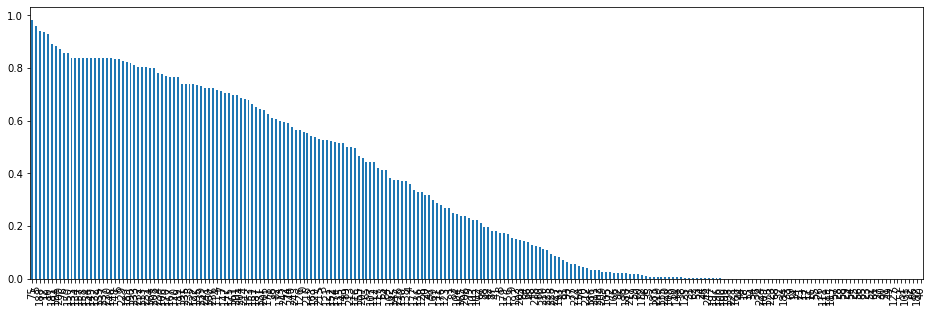

In [32]:
p_values.plot.bar(figsize=(16, 5))

In [34]:
# In theory the features with these values are very important features.
p_values = p_values[p_values < 0.05]
p_values

110    4.639047e-02
70     4.286237e-02
212    4.162651e-02
186    3.342479e-02
211    3.232153e-02
           ...     
101    3.557912e-55
22     5.565785e-56
86     4.187175e-61
182    1.494938e-68
40     7.665738e-70
Length: 88, dtype: float64

In [35]:
p_values.index

Int64Index([110,  70, 212, 186, 211, 202, 209, 105,  72, 166,  92,  95, 180,
            217,  59,  60, 172,  98,  35, 183, 219, 115, 220, 108,  50, 144,
             38, 125,  31,  62,  53,  24,  46, 244, 197, 196, 100, 199, 198,
            221, 168,  44,  18,  15,  34,  36, 224, 109, 178, 223,  68,  32,
            184,  33,  69,  14,  21,  13,  17,  16,  55,  26, 111, 119, 185,
             57,  28,  58,  29,  54,  25,  56,  85,  23,  52,  61,  27,  30,
             91,  49, 127,   2,  51, 101,  22,  86, 182,  40],
           dtype='int64')

In [37]:
# Get Training and Test data based on these index
x_train_p = x_train_unique[p_values.index]
x_test_p = x_test_unique[p_values.index]

In [38]:
%%time
# After P_values
run_random_forest(x_train_p, x_test_p, y_train, y_test)

Accuracy on test set: 
0.9525
CPU times: user 4.18 s, sys: 107 ms, total: 4.29 s
Wall time: 1.64 s


In [40]:
%%time
# Original Dataset
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 7.72 s, sys: 151 ms, total: 7.87 s
Wall time: 2.5 s


As we can see the accuraccy after p_values are 0.0035 less than on original data. But the training time has been reduced significantly.